### SQL to Python Connection

In [1]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector
from mysql.connector import Error
import warnings
warnings.filterwarnings("ignore")

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='venmgmt',
                                         user='root',
                                         password='Nilimapande@23')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)

Connected to MySQL Server version  8.0.33
You're connected to database:  ('venmgmt',)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### 1. Payment Method Analysis

In [4]:
query1 = """ SELECT Pay_Method as PaymentMethod, Count(Per_ID) as CountMethod
FROM Vendor 
GROUP BY Pay_Method """

query1_df = pd.read_sql_query(query1, connection)

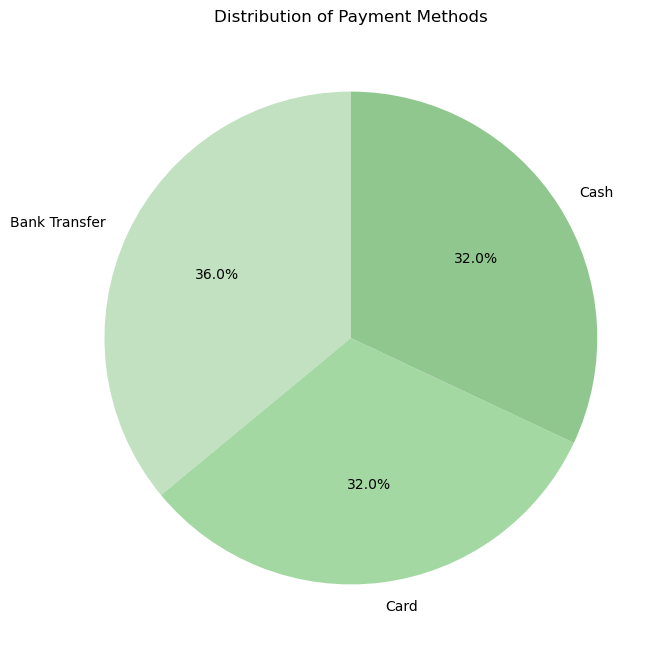

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

colors = ['#C1E1C1', '#A3D8A3', '#8FC78F']

plt.figure(figsize=(8, 8))
plt.pie(query1_df['CountMethod'], labels=query1_df['PaymentMethod'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Payment Methods')
plt.show()

### 2. Analysis of Quantity of Services Requested 

In [6]:
query2 = """SELECT Det_Desc as DescReq, Sum(Quantity) as TotalReq
FROM PO_Detail
GROUP BY Det_Desc
"""

query2_df = pd.read_sql_query(query2, connection)

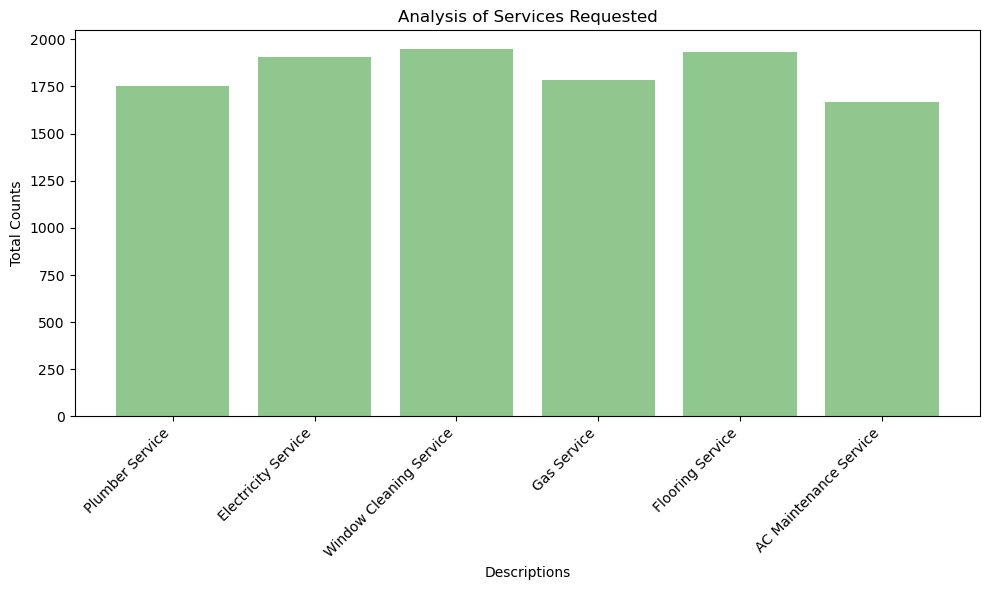

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(query2_df['DescReq'], query2_df['TotalReq'], color='#8FC78F')

plt.xlabel('Descriptions')
plt.ylabel('Total Counts')
plt.title('Analysis of Services Requested')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

### 3. Comparison of Average price per Vendor with overall average price 

In [8]:
query3 = """ SELECT v.Per_ID as Vendor_ID,
p.Per_Name as Vendor_Name,
AVG(i.TotalAmt) as VendorAverage
FROM Vendor v
INNER JOIN Person p ON v.Per_ID = p.Per_ID
INNER JOIN Inv_Header i ON v.Per_ID = i.Ven_ID
GROUP BY i.Ven_ID
HAVING VendorAverage > (SELECT AVG(TotalAmt) FROM Inv_Header)
ORDER BY i.Ven_ID;
"""

query3_df = pd.read_sql_query(query3, connection)

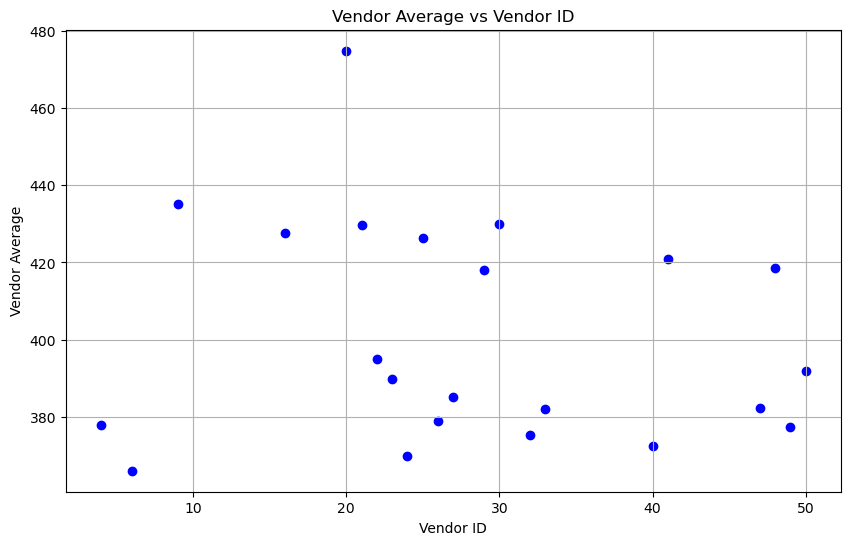

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(query3_df['Vendor_ID'], query3_df['VendorAverage'], color='blue')
plt.title('Vendor Average vs Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Vendor Average')
plt.grid(True)
plt.show()

### 4. Area Analysis

In [10]:
query4 = """ SELECT AreaAnalysis, Count(x.AreaAnalysis) AS Counts
FROM (SELECT u.unit_name as UnitName,
             p.prop_name as PropertyName,
             CASE WHEN u.unit_area < 1000 THEN 'Common Spaces'
             WHEN u.unit_area BETWEEN 1000 AND 1250 THEN 'Less Area'
                  WHEN u.unit_area BETWEEN 1251 AND 1350 THEN 'Medium Area'
                  WHEN u.unit_area > 1351 THEN 'More Area'
            END as AreaAnalysis
       FROM Unit u
       INNER JOIN Tenant t ON u.Unit_ID = t.Unit_ID
       INNER JOIN PO_Header po ON t.Per_ID = po.Ten_ID
       INNER JOIN PO_Detail pd ON po.PO_ID = pd.PO_ID
       INNER JOIN Property p ON u.Prop_ID = p.Prop_ID
       WHERE pd.Det_Desc = 'Flooring Service') x
GROUP BY AreaAnalysis
ORDER BY Counts;
"""

query4_df = pd.read_sql_query(query4, connection)

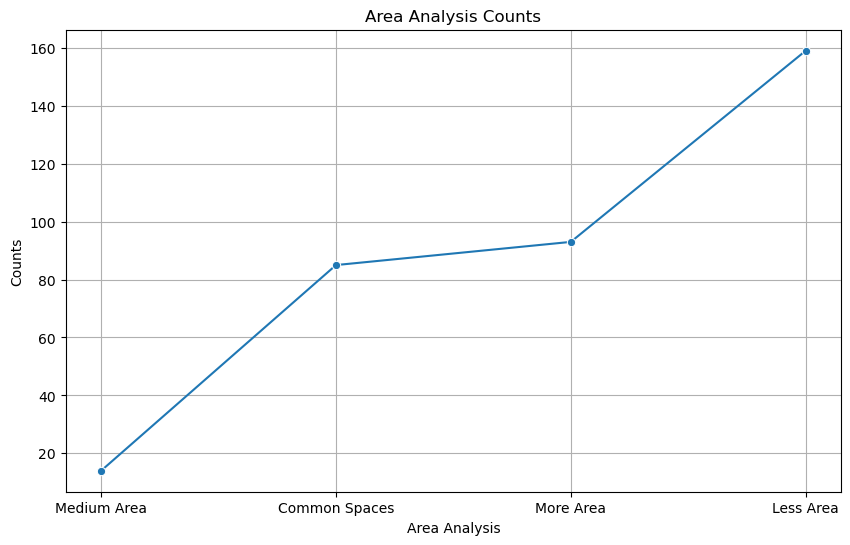

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='AreaAnalysis', y='Counts', data=query4_df, marker='o')
plt.title('Area Analysis Counts')
plt.xlabel('Area Analysis')
plt.ylabel('Counts')
plt.grid(True)
plt.show()